1.ARIMA is a method used to predict future values in a time series. Think of it like looking at past patterns to guess what happens next. It has three main parts:
2.R (AutoRegressive) – "p":
This part looks at past values to predict the next value.
Example: If you want to predict today’s temperature, you might use temperatures from the past 3 days.

I (Integrated) – "d":
This part removes trends to make the data more stable (stationary).
Example: If sales keep increasing every month, we look at the difference between months instead of raw sales to make it easier to forecast.

MA (Moving Average) – "q":
This part looks at past prediction errors to improve forecasts.
Example: If your previous predictions were slightly off, this part helps correct them.

Stationary:
ARIMA works best when the data is stationary, meaning:
1.Average (mean) stays roughly the same over time
2.Variance doesn’t change much
3.Pattern of correlation stays consistent

example

Imagine predicting your daily steps:
AR = remember the past few days’ steps
I = focus on changes instead of absolute steps
MA = adjust based on how wrong your previous guesses were

In [2]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import statsmodels

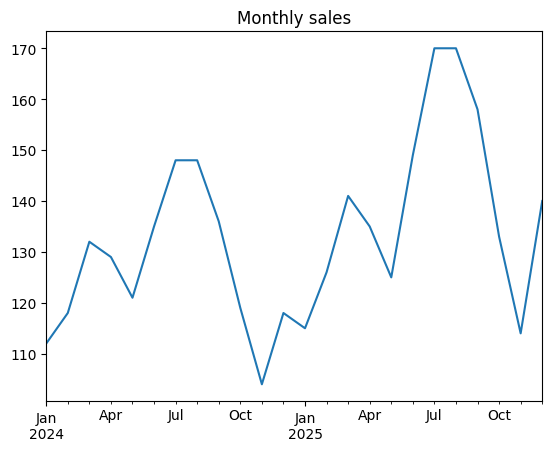

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt 

data=pd.Series([112,118,132,129,121,135,148,148,136,119,104,118,
                115,126,141,135,125,149,170,170,158,133,114,140],
               index=pd.date_range(start='2024-01',periods=24,freq='ME'))
#plot the data
data.plot(title="Monthly sales")
plt.show()


In [10]:
#Fit ARIMA Model(p=1,d=1,q=1)
model=ARIMA(data,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.270
Date:                Thu, 27 Nov 2025   AIC                            190.540
Time:                        10:10:37   BIC                            193.947
Sample:                    01-31-2024   HQIC                           191.397
                         - 12-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1429      0.676     -0.211      0.833      -1.468       1.182
ma.L1          0.6126      0.533      1.149      0.251      -0.433       1.658
sigma2       176.3081     68.800      2.563      0.0

1.ar.L1 (autoregressive-this tell how much previous value influnces the current one),very small close to zero
2.MA(ma.L1)=0.6126 ,this tell how past errors affect the prediction,value is moderate
3.sigma^2 high -more randomness in tha data

ARIMA forecasting works by using past values (AR), differenced values (I), and past errors (MA) to predict future points. Once the model is fitted, it projects the next 6 months by extending the learned pattern forward in time. The model generates forecasts along with confidence intervals showing uncertainty

2026-01-31    154.395610
2026-02-28    152.338815
2026-03-31    152.632683
2026-04-30    152.590696
2026-05-31    152.596695
2026-06-30    152.595838
Freq: ME, Name: predicted_mean, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

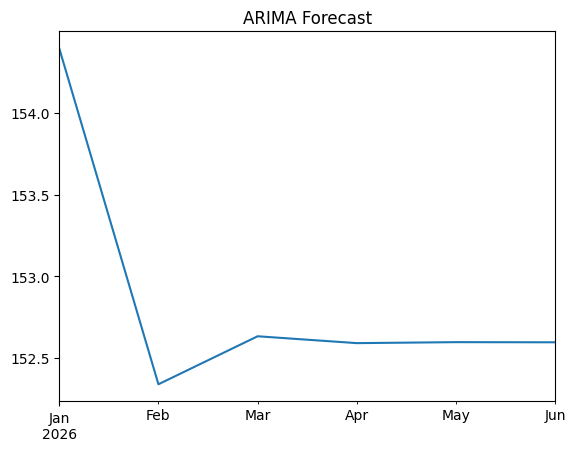

In [11]:
##forecastnext 6 month
forecast=model_fit.forecast(steps=6)
print(forecast)
forecast.plot(title='ARIMA Forecast')
plt.show